<a href="https://colab.research.google.com/github/JosephWildey/MachineLearningModels/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

## Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv("/home/joe/Documents/ML-Resources/Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


Y needs to be reshaped into a 2d array just like x. It can be done by assinging it the result of reshaping itself.
Passing len(y) as the first argument provides the number of rowss in the array. Passing the '1' indicates the numbers of columns in the array that we are transforming into a 2d array.

In [ ]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

The same standard scaler object will not be used on both the dependent and independent variables because they do not have the same mean and standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [ ]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

The name of the kernel we use for the SVR is the argument. It is recommened to just always use RBF. It's the most commonly applied one.
Ravel was apparently necessary on y to flatten it.

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x, y.ravel())

SVR()

## Predicting a new result

Inverse transform is necessary to get the correct result on both the x and y axis, and make it interpretable.

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualizing the SVR model

Apply the inverse to get the scales back and get an easy to read graph

Apply sc_x transformations on x, sc_y transformations on y

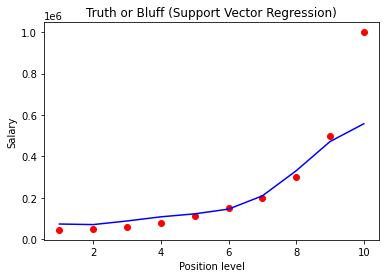

In [ ]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="red")

plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color="blue")

plt.title("Truth or Bluff (Support Vector Regression)")

plt.xlabel("Position level")

plt.ylabel("Salary")

plt.show()

## Visualizing the SVR model (higher resolution curve)

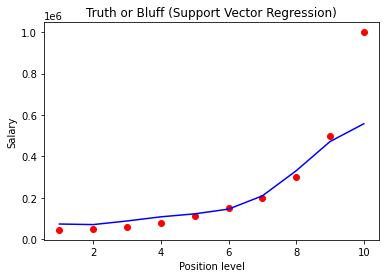

In [ ]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color="blue")
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()